## Cel: ANALIZA ZALEŻNOŚCI + WNIOSKI
źródło:'https://danepubliczne.imgw.pl/api/data/synop'

In [1]:
import pandas as pd
import json 
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
url ='https://danepubliczne.imgw.pl/api/data/synop'
response = requests.get(url)

if response.status_code == 200:
    print('correct connection, status code: ', response.status_code)
    print('----------------------------------------------------------------------------------')
    data = response.json()
    df = pd.DataFrame(data)
    df.info()
    print('----------------------------------------------------------------------------------')
else:
    print('problem with connection, status code: ', response.status_code)

correct connection, status code:  200
----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_stacji            62 non-null     object
 1   stacja               62 non-null     object
 2   data_pomiaru         62 non-null     object
 3   godzina_pomiaru      62 non-null     object
 4   temperatura          61 non-null     object
 5   predkosc_wiatru      62 non-null     object
 6   kierunek_wiatru      62 non-null     object
 7   wilgotnosc_wzgledna  61 non-null     object
 8   suma_opadu           62 non-null     object
 9   cisnienie            58 non-null     object
dtypes: object(10)
memory usage: 5.0+ KB
----------------------------------------------------------------------------------


In [6]:
df.head(10)

,id_stacji,stacja,data_pomiaru,godzina_pomiaru,temperatura,predkosc_wiatru,kierunek_wiatru,wilgotnosc_wzgledna,suma_opadu,cisnienie
0,12295,Białystok,2025-05-16,11,8,3,140,88.9,10.2,1004
1,12600,Bielsko Biała,2025-05-16,11,10,8,240,61.4,2.9,1012.4
2,12235,Chojnice,2025-05-16,11,8.8,4,350,79.0,6.9,1010.7
3,12550,Częstochowa,2025-05-16,11,10.3,4,280,73.9,1.5,1009.5
4,12160,Elbląg,2025-05-16,11,7,7,350,82.8,26.1,1008.2
5,12155,Gdańsk,2025-05-16,11,9,6,360,74.7,9.4,1009.6
6,12300,Gorzów,2025-05-16,11,14.7,7,360,36.4,1.2,1012.2
7,12135,Hel,2025-05-16,11,10,6,350,73.8,3.2,1010.1
8,12500,Jelenia Góra,2025-05-16,11,10.2,2,320,69.8,7.6,1012.8
9,12435,Kalisz,2025-05-16,11,6.8,6,350,88.8,0.6,1010.7


## Wykres korelacji między temperaturą a ciśnieniem


<Axes: xlabel='temperatura', ylabel='cisnienie'>

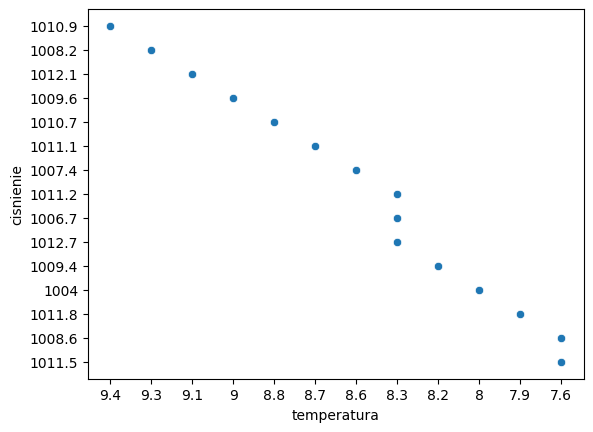

In [13]:
sns.scatterplot(data=df.sort_values(by='temperatura',ascending=False).head(15), x='temperatura', y='cisnienie')


In [17]:
df[['temperatura', 'cisnienie']].corr()

,temperatura,cisnienie
temperatura,1.000000,0.645192
cisnienie,0.645192,1.000000


## Wnioski:

Na wykresie widoczna jest korelacja spadku ciśnienia ze wzrostem temperatury co daje nam ujemną korelację

## Heatmapa korelacji pogodowych zmiennych

<Axes: >

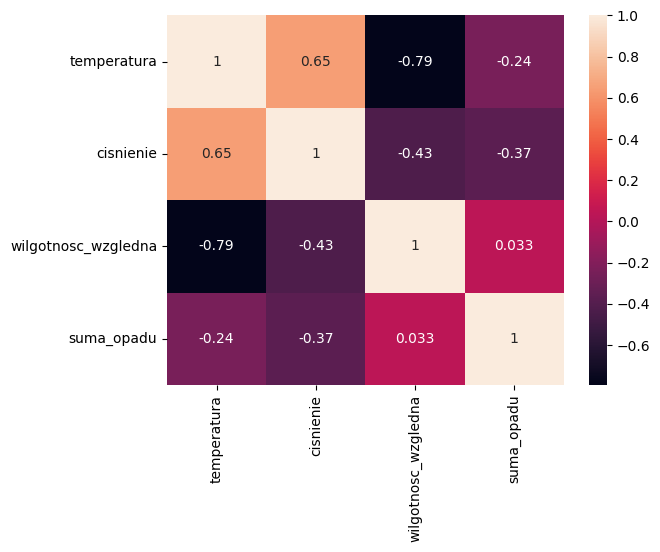

In [18]:
sns.heatmap(data= df[['temperatura','cisnienie','wilgotnosc_wzgledna', 'suma_opadu']].corr(),annot=True)